# The Problem

When we go grocery shopping, we often have a standard list of things to buy. Each shopper has a distinctive list, depending on one’s needs and preferences. A housewife might buy healthy ingredients for a family dinner, while a bachelor might buy beer and chips. Understanding these buying patterns can help to increase sales in several ways. If there is a pair of items, X and Y, that are frequently bought together:

1. Both X and Y can be placed on the same shelf, so that buyers of one item would be prompted to buy the other.
2. Promotional discounts could be applied to just one out of the two items.
3. Advertisements on X could be targeted at buyers who purchase Y.
4. X and Y could be combined into a new product, such as having Y in flavors of X.

While we may know that certain items are frequently bought together, the question is, how do we uncover these associations?

Besides increasing sales profits, association rules can also be used in other fields. In medical diagnosis for instance, understanding which symptoms tend to co-morbid can help to improve patient care and medicine prescription.

# Definition

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

### Measure 1: Support

This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

Table 1. Example Transactions (below)

If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.

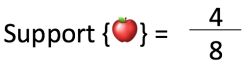

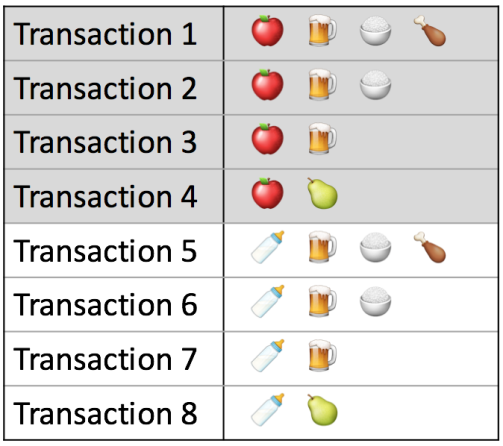

### Measure 2: Confidence

This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.


Association Rule Confidence eqn
One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

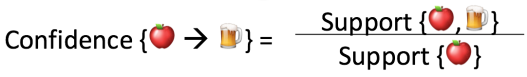

### Measure 3: Lift

This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

# Association Rule Lift eqn
### An Illustration

We use a dataset on grocery transactions from the arules R library. It contains actual transactions at a grocery outlet over 30 days. The network graph below shows associations between selected items. Larger circles imply higher support, while red circles imply higher lift:

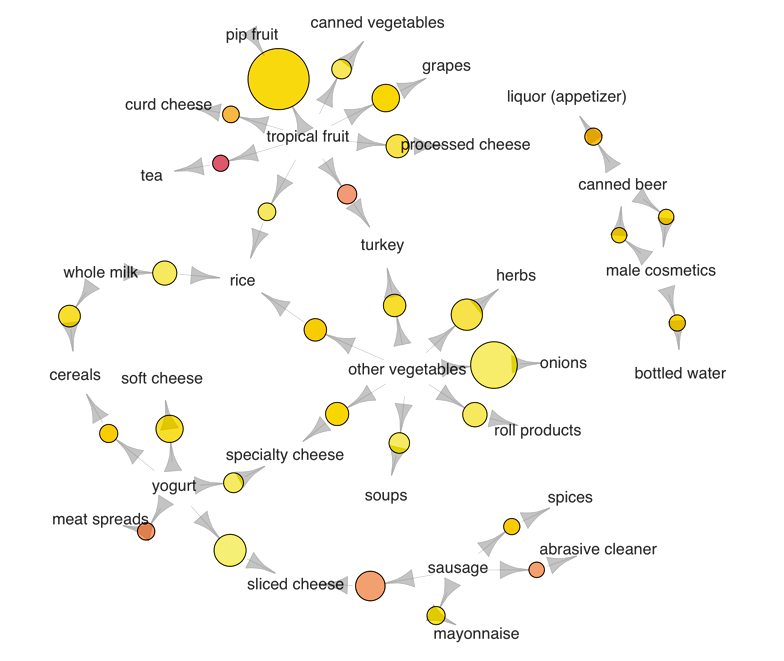

Associations between selected items. Visualized using the arulesViz R library.

Several purchase patterns can be observed. For example:

1. The most popular transaction was of pip and tropical fruits
2. Another popular transaction was of onions and other vegetables
3. If someone buys meat spreads, he is likely to have bought yogurt as well
4. Relatively many people buy sausage along with sliced cheese
5. If someone buys tea, he is likely to have bought fruit as well, possibly inspiring the production of fruit-flavored tea

Recall that one drawback of the confidence measure is that it tends to misrepresent the importance of an association. To demonstrate this, we go back to the main dataset to pick 3 association rules containing beer:

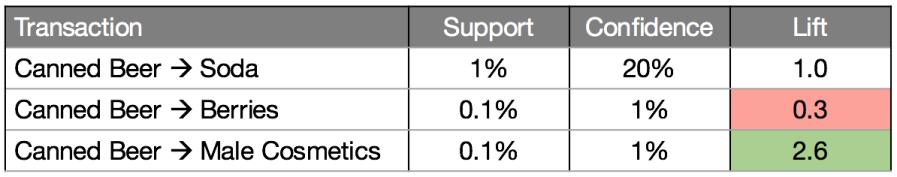

The {beer -> soda} rule has the highest confidence at 20%. However, both beer and soda appear frequently across all transactions (see Table 3), so their association could simply be a fluke. This is confirmed by the lift value of {beer -> soda}, which is 1, implying no association between beer and soda.


association rules support example
Table 3. Support of individual items
On the other hand, the {beer -> male cosmetics} rule has a low confidence, due to few purchases of male cosmetics in general. However, whenever someone does buy male cosmetics, he is very likely to buy beer as well, as inferred from a high lift value of 2.6. The converse is true for {beer -> berries}. With a lift value below 1, we may conclude that if someone buys berries, he would likely be averse to beer.

It is easy to calculate the popularity of a single itemset, like {beer, soda}. However, a business owner would not typically ask about individual itemsets. Rather, the owner would be more interested in having a complete list of popular itemsets. To get this list, one needs to calculate the support values for every possible configuration of items, and then shortlist the itemsets that meet the minimum support threshold.

In a store with just 10 items, the total number of possible configurations to examine would be a whopping 1023. This number increases exponentially in a store with hundreds of items.

Is there a way to reduce the number of item configurations to consider?

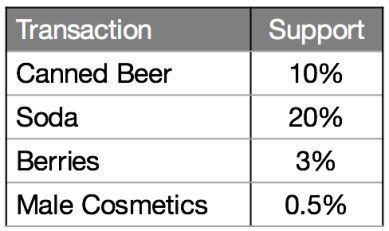

# Apriori Algorithm

The apriori principle can reduce the number of itemsets we need to examine. Put simply, the apriori principle states that

if an itemset is infrequent, then all its supersets must also be infrequent

This means that if {beer} was found to be infrequent, we can expect {beer, pizza} to be equally or even more infrequent. So in consolidating the list of popular itemsets, we need not consider {beer, pizza}, nor any other itemset configuration that contains beer.

Finding itemsets with high support
Using the apriori principle, the number of itemsets that have to be examined can be pruned, and the list of popular itemsets can be obtained in these steps:

Step 0. Start with itemsets containing just a single item, such as {apple} and {pear}.

Step 1. Determine the support for itemsets. Keep the itemsets that meet your minimum support threshold, and remove itemsets that do not.

Step 2. Using the itemsets you have kept from Step 1, generate all the possible itemset configurations.

Step 3. Repeat Steps 1 & 2 until there are no more new itemsets.

This iterative process is illustrated in the animated GIF below:

Association Rules Apriori Tutorial Explanation.gif
Reducing candidate itemsets using the Apriori Algorithm
As seen in the animation, {apple} was determine to have low support, hence it was removed and all other itemset configurations that contain apple need not be considered. This reduced the number of itemsets to consider by more than half.

Note that the support threshold that you pick in Step 1 could be based on formal analysis or past experience. If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold.

Finding item rules with high confidence or lift
We have seen how the apriori algorithm can be used to identify itemsets with high support. The same principle can also be used to identify item associations with high confidence or lift. Finding rules with high confidence or lift is less computationally taxing once high-support itemsets have been identified, because confidence and lift values are calculated using support values.

Take for example the task of finding high-confidence rules. If the rule

 

    {beer, chips -> apple}
 

has low confidence, all other rules with the same constituent items and with apple on the right hand side would have low confidence too. Specifically, the rules

 

    {beer -> apple, chips}
    {chips -> apple, beer}
 

would have low confidence as well. As before, lower level candidate item rules can be pruned using the apriori algorithm, so that fewer candidate rules need to be examined.

Limitations
Computationally Expensive. Even though the apriori algorithm reduces the number of candidate itemsets to consider, this number could still be huge when store inventories are large or when the support threshold is low. However, an alternative solution would be to reduce the number of comparisons by using advanced data structures, such as hash tables, to sort candidate itemsets more efficiently.
Spurious Associations. Analysis of large inventories would involve more itemset configurations, and the support threshold might have to be lowered to detect certain associations. However, lowering the support threshold might also increase the number of spurious associations detected. To ensure that identified associations are generalizable, they could first be distilled from a training dataset, before having their support and confidence assessed in a separate test dataset.

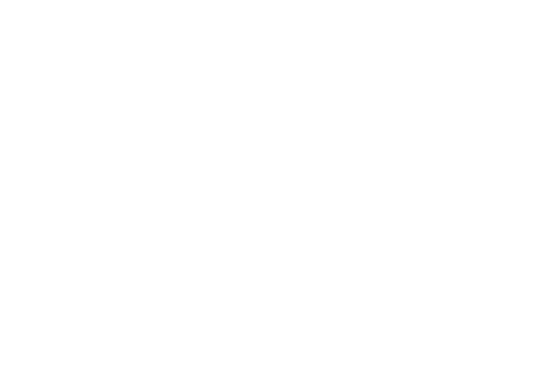